# Extraction des features des images 

## Importation des libreries et packages nécaissaire 

In [1]:
# === 📦 LIBRAIRIES STANDARD ===
import os
import re
import time
import gc

# === 📊 MANIPULATION DE DONNÉES ===
import numpy as np
import pandas as pd

# === 📈 VISUALISATION ===
import matplotlib.pyplot as plt
import seaborn as sns

# === 🖼️ TRAITEMENT D'IMAGES ===
import cv2
from PIL import Image

# === 🧠 DEEP LEARNING - TENSORFLOW / KERAS ===
from tensorflow.keras.applications import ResNet50, VGG16, MobileNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras.preprocessing.image import (
    load_img,
    img_to_array,
    ImageDataGenerator
)
from tensorflow.keras import backend as K
from tensorflow.keras.applications.vgg16 import preprocess_input

# === 🤖 MACHINE LEARNING & ÉVALUATION ===
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    classification_report,
    adjusted_rand_score,
    normalized_mutual_info_score
)


## Importation du fichier : 

In [2]:
df = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv', sep=',')
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

## créer la colonne category : (pour les labels)

In [3]:
def extract_main_category(category_tree):
    """
    Extrait la catégorie principale depuis une chaîne structurée.
    Exemple: '["Home & Kitchen > Kitchen & Dining > Cookware"]' → 'Home & Kitchen'
    """
    if isinstance(category_tree, str):
        # On s'assure que c'est une chaîne de caractères
        match = re.search(r'"([^>]+)>', category_tree)
        if match:
            return match.group(1).strip()
    return None


In [4]:
df['category'] = df['product_category_tree'].apply(extract_main_category)


In [5]:
df.columns 

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'category'],
      dtype='object')

## Chargement et redimensionnement des images depuis un DataFrame

Définit un chemin (image_dir) vers le dossier contenant les fichiers image.

Déclare une fonction load_images_from_dataframe qui :

Prend en entrée un DataFrame (df) contenant des noms d’images.

Pour chaque nom d'image :

Construit le chemin d'accès complet au fichier.

Lit l’image depuis le disque avec OpenCV (cv2.imread).

La redimensionne à la taille définie (par défaut 224x224).

La convertit en tableau numpy.

Ignore les fichiers introuvables et affiche un message d’erreur.

Retourne toutes les images sous forme de tableau NumPy (forme : n_images x 224 x 224 x 3).

Charge les images en appelant la fonction avec un DataFrame nommé df.

Affiche la forme du tableau d’images chargé pour confirmation.

In [6]:
# Définition du chemin où se trouvent les images
image_dir = r"C:\Users\mario\OneDrive\Bureau\OPENCLASSROOMS\projet 6\Images"

# Fonction de chargement et redimensionnement des images à une taille standard (224x224 pour VGG ou ResNet)
def load_images_from_dataframe(df, image_column='image', target_size=(224, 224)):
    """
    Charge les images en utilisant les noms dans un DataFrame et les redimensionne.
    
    Arguments :
        df : DataFrame contenant les noms de fichiers images.
        image_column : nom de la colonne contenant les noms d’images.
        target_size : taille souhaitée pour les images (largeur, hauteur).
        
    Retour :
        X : tableau numpy contenant toutes les images transformées.
    """
    images = []

    for name in df[image_column]:
        # Construction du chemin complet de l'image
        img_path = os.path.join(image_dir, name)
        
        # Lecture de l'image avec OpenCV
        img = cv2.imread(img_path)
        if img is None:
            print(f"⚠️ Image introuvable : {img_path}")
            continue
        
        # Redimensionnement de l'image pour correspondre à la taille attendue par les CNN
        img = cv2.resize(img, target_size)
        
        # Conversion en tableau numpy
        images.append(img)

    # Retour d'un tableau numpy de forme (n_images, largeur, hauteur, canaux)
    return np.array(images)

# Chargement des images
X_images = load_images_from_dataframe(df)

print("✅ Images chargées :", X_images.shape)



✅ Images chargées : (1050, 224, 224, 3)


# Prétraitements OpenCV — Contraste, flou, égalisation

## 2.1 Fonction globale de prétraitement OpenCV

In [7]:
def preprocess_image_opencv(img, grayscale=True):
    """
    Applique un prétraitement sur une image avec OpenCV :
    - Amélioration locale du contraste avec CLAHE sur la luminance (canal L du LAB)
    - Réduction du bruit par un flou gaussien léger
    - Optionnel : conversion en niveaux de gris
    
    Paramètres :
        img : image couleur BGR (OpenCV)
        grayscale : bool, si True retourne une image en niveaux de gris
    
    Retour :
        image prétraitée (BGR ou niveaux de gris selon l’option)
    """
    # Conversion BGR → LAB pour isoler la luminance
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    # Application de CLAHE sur le canal L
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    # Reconstruction de l’image LAB avec la luminance améliorée
    limg = cv2.merge((cl, a, b))
    enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    # Réduction du bruit par un flou gaussien 3x3
    blurred = cv2.GaussianBlur(enhanced_img, (3, 3), 0)

    # Conversion optionnelle en niveaux de gris
    if grayscale:
        return cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
    else:
        return blurred


def preprocess_images_batch(images, grayscale=True, verbose=True):
    """
    Applique le prétraitement à un ensemble d’images (tableau numpy ou liste).
    
    Paramètres :
        images : liste ou np.array d’images BGR
        grayscale : bool, convertit les images en niveaux de gris si True
        verbose : bool, affiche les erreurs éventuelles
    
    Retour :
        np.array d’images prétraitées
    """
    processed = []
    for i, img in enumerate(images):
        try:
            processed_img = preprocess_image_opencv(img, grayscale=grayscale)
            processed.append(processed_img)
        except Exception as e:
            if verbose:
                print(f"⚠️ Erreur à l’image {i} : {e}")
    return np.array(processed)


In [8]:
# Exemple : prétraiter toutes les images en couleur
X_images_preprocessed = preprocess_images_batch(X_images, grayscale=True)

# Ou en niveaux de gris pour extraction de features classiques
X_images_preprocessed_gray = preprocess_images_batch(X_images, grayscale=True)


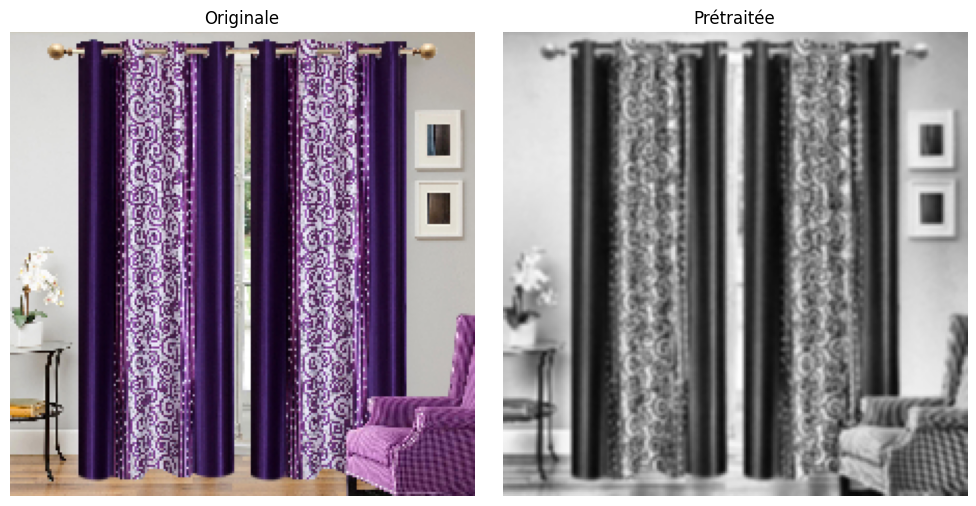

In [9]:
def show_before_after(original, processed, idx=0, grayscale=True):
    """
    Affiche côte à côte une image originale et son prétraitement.
    
    Paramètres :
        original : np.array d’images originales (BGR ou gris)
        processed : np.array d’images prétraitées (BGR ou gris)
        idx : index de l’image à afficher
        grayscale : bool, True si images en niveaux de gris
        
    Retour :
        Affichage matplotlib côte à côte
    """
    if idx < 0 or idx >= len(original):
        print(f"⚠️ Index {idx} hors limites. Valeur valide entre 0 et {len(original)-1}")
        return
    
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    if grayscale:
        plt.imshow(original[idx], cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(original[idx], cv2.COLOR_BGR2RGB))
    plt.title("Originale")
    plt.axis('off')
    
    plt.subplot(1,2,2)
    if grayscale:
        plt.imshow(processed[idx], cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(processed[idx], cv2.COLOR_BGR2RGB))
    plt.title("Prétraitée")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation (images couleur)
show_before_after(X_images, X_images_preprocessed, idx=0, grayscale=False)

# Extraction de descripteurs ORB / SIFT

Pourquoi utiliser ORB ou SIFT ?
Ces méthodes sont utiles pour :

Détecter des points d’intérêt locaux (coins, textures, formes).

Extraire des descripteurs robustes à la rotation, à l’échelle, etc.

Comparer des images sans avoir besoin de tout un CNN.



## Détection avec ORB

In [10]:
def extract_orb_descriptors(img, n_features=500):
    """
    Extrait les descripteurs ORB d’une image (grayscale).
    
    Retour :
        descripteurs ORB (np.array shape=(n_keypoints, 32)) ou None
    """
    orb = cv2.ORB_create(nfeatures=n_features)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    return descriptors


## Détection avec SIFT

In [11]:
def extract_sift_descriptors(img):
    """
    Extrait les descripteurs SIFT d’une image (grayscale).
    
    Retour :
        descripteurs SIFT (np.array shape=(n_keypoints, 128)) ou None
    """
    sift = cv2.SIFT_create()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    return descriptors


## Représenter toutes les images dans un espace fixe : Bag of Words (BoW)

SIFT / ORB renvoient un nombre variable de descripteurs par image. Pour les utiliser dans un modèle de machine learning (type SVM ou réseau), on doit les transformer en vecteurs fixes.

On fait ça avec un Bag of Visual Words (BoW) :

Clustering des descripteurs (k-means)

Chaque image devient un histogramme de "mots visuels"

Début du traitement...


Chargement des images: 100%|███████████████████████████████████████████████████████| 1050/1050 [00:28<00:00, 37.22it/s]



✅ 1050 images chargées avec succès


Création des histogrammes: 100%|██████████████████████████████████████████████████| 1050/1050 [00:01<00:00, 974.63it/s]


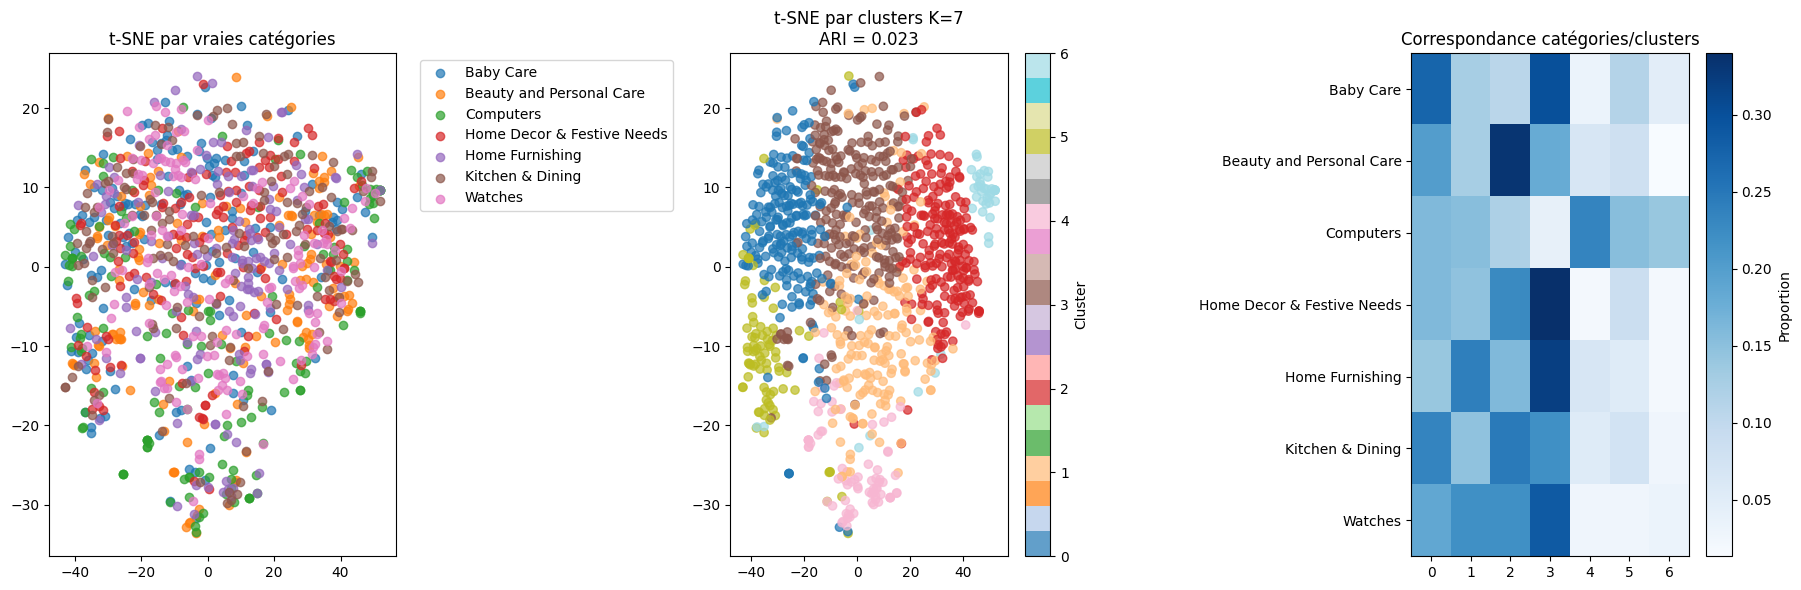


Résultats :
- ARI entre vrais clusters et clusters appris : 0.023
- Répartition des catégories réelles :
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: count, dtype: int64

- Répartition des clusters prédits :
3    253
2    212
0    203
1    174
5     88
4     75
6     45
Name: count, dtype: int64

💾 Résultats sauvegardés dans : C:\Users\mario\OneDrive\Bureau\OPENCLASSROOMS\projet 6\Images\results


In [12]:
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

# Configuration
IMAGE_DIR = r"C:\Users\mario\OneDrive\Bureau\OPENCLASSROOMS\projet 6\Images"
os.makedirs(os.path.join(IMAGE_DIR, "results"), exist_ok=True)

# 1. Fonction pour charger les images depuis le DataFrame
def load_images_from_df(df, image_dir):
    """Charge les images et les labels depuis le DataFrame"""
    images = []
    valid_paths = []
    labels = []
    failed_images = []
    
    for idx, row in tqdm(df.iterrows(), total=len(df), desc="Chargement des images"):
        # Construction du chemin d'accès à partir de la colonne 'image'
        img_path = os.path.join(image_dir, os.path.basename(row['image']))
        
        if os.path.exists(img_path):
            try:
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (224, 224))  # Standardisation de la taille
                    images.append(img)
                    valid_paths.append(img_path)
                    labels.append(row['category'])  # Utilisation de la colonne 'category'
                else:
                    failed_images.append(img_path)
            except Exception as e:
                failed_images.append(img_path)
        else:
            failed_images.append(img_path)
    
    if failed_images:
        print(f"\n⚠️ {len(failed_images)} images n'ont pas pu être chargées")
        if len(failed_images) < 10:  # Affiche seulement si peu d'erreurs
            print("Exemples de fichiers problématiques :", failed_images[:5])
    
    print(f"\n✅ {len(images)} images chargées avec succès")
    return np.array(images), np.array(valid_paths), np.array(labels)

# 2. Pipeline d'extraction de features
def extract_image_features(images):
    """Extrait les features ORB et construit le vocabulaire visuel"""
    # Extraction ORB
    descriptors = []
    for img in tqdm(images, desc="Extraction des descripteurs"):
        try:
            orb = cv2.ORB_create(nfeatures=500)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            _, desc = orb.detectAndCompute(gray, None)
            descriptors.append(desc if desc is not None else np.zeros((1, 32), dtype=np.uint8))
        except:
            descriptors.append(np.zeros((1, 32), dtype=np.uint8))
    
    # Construction du vocabulaire
    all_descriptors = np.vstack([d for d in descriptors if len(d) > 10])
    kmeans = KMeans(n_clusters=100, random_state=42, n_init='auto').fit(all_descriptors)
    
    # Conversion en BoVW
    features = []
    for desc in tqdm(descriptors, desc="Création des histogrammes"):
        hist = np.bincount(kmeans.predict(desc), minlength=100)
        features.append(hist / (np.linalg.norm(hist) + 1e-7))  # Normalisation L2
    
    return np.array(features), kmeans

# 3. Analyse comparative
def analyze_clusters(features, true_labels):
    """Compare les vrais labels avec le clustering K=7"""
    # Conversion des labels en numériques
    unique_labels = np.unique(true_labels)
    label_to_id = {label: i for i, label in enumerate(unique_labels)}
    true_clusters = np.array([label_to_id[l] for l in true_labels])
    
    # Clustering K=7
    kmeans = KMeans(n_clusters=7, random_state=42)
    pred_clusters = kmeans.fit_predict(features)
    
    # Calcul ARI
    ari = adjusted_rand_score(true_clusters, pred_clusters)
    
    # t-SNE
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_results = tsne.fit_transform(features)
    
    # Visualisation
    plt.figure(figsize=(18, 6))
    
    # Vraies catégories
    plt.subplot(1, 3, 1)
    for label in unique_labels:
        mask = true_labels == label
        plt.scatter(tsne_results[mask, 0], tsne_results[mask, 1], label=label, alpha=0.7)
    plt.title("t-SNE par vraies catégories")
    plt.legend(bbox_to_anchor=(1.05, 1))
    
    # Clusters prédits
    plt.subplot(1, 3, 2)
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
                        c=pred_clusters, cmap='tab20', alpha=0.7)
    plt.colorbar(scatter, label='Cluster')
    plt.title(f"t-SNE par clusters K=7\nARI = {ari:.3f}")
    
    # Matrice de contingence
    plt.subplot(1, 3, 3)
    contingency = pd.crosstab(
        index=pd.Series(true_labels, name='Catégorie'),
        columns=pd.Series(pred_clusters, name='Cluster'),
        normalize='index'
    )
    plt.imshow(contingency, cmap='Blues', aspect='auto')
    plt.colorbar(label='Proportion')
    plt.xticks(range(7), range(7))
    plt.yticks(range(len(unique_labels)), unique_labels)
    plt.title('Correspondance catégories/clusters')
    
    plt.tight_layout()
    plt.savefig(os.path.join(IMAGE_DIR, "results", "cluster_comparison.png"), dpi=300)
    plt.show()
    
    return {
        'true_clusters': true_clusters,
        'pred_clusters': pred_clusters,
        'tsne_results': tsne_results,
        'ari_score': ari,
        'unique_labels': unique_labels
    }

# Pipeline principal
print("Début du traitement...")
images, image_paths, labels = load_images_from_df(df, IMAGE_DIR)
features, kmeans_model = extract_image_features(images)
results = analyze_clusters(features, labels)

# Sauvegarde des résultats
results_df = pd.DataFrame({
    'uniq_id': df.loc[df['image'].isin([os.path.basename(p) for p in image_paths]), 'uniq_id'],
    'image_path': image_paths,
    'true_category': labels,
    'predicted_cluster': results['pred_clusters'],
    'tsne_x': results['tsne_results'][:, 0],
    'tsne_y': results['tsne_results'][:, 1]
})

# Ajout des métadonnées originales
original_cols = ['product_name', 'retail_price', 'discounted_price', 'brand', 'product_rating']
for col in original_cols:
    if col in df.columns:
        results_df[col] = df.loc[df['image'].isin([os.path.basename(p) for p in image_paths]), col]

results_df.to_csv(os.path.join(IMAGE_DIR, "results", "clustering_results.csv"), index=False)
np.save(os.path.join(IMAGE_DIR, "results", "image_features.npy"), features)

print("\nRésultats :")
print(f"- ARI entre vrais clusters et clusters appris : {results['ari_score']:.3f}")
print("- Répartition des catégories réelles :")
print(pd.Series(labels).value_counts())
print("\n- Répartition des clusters prédits :")
print(pd.Series(results['pred_clusters']).value_counts())
print(f"\n💾 Résultats sauvegardés dans : {os.path.join(IMAGE_DIR, 'results')}")

## SIFT 

Démarrage du traitement SIFT...


Création BoVW: 100%|██████████████████████████████████████████████████████████████| 1050/1050 [00:01<00:00, 593.85it/s]


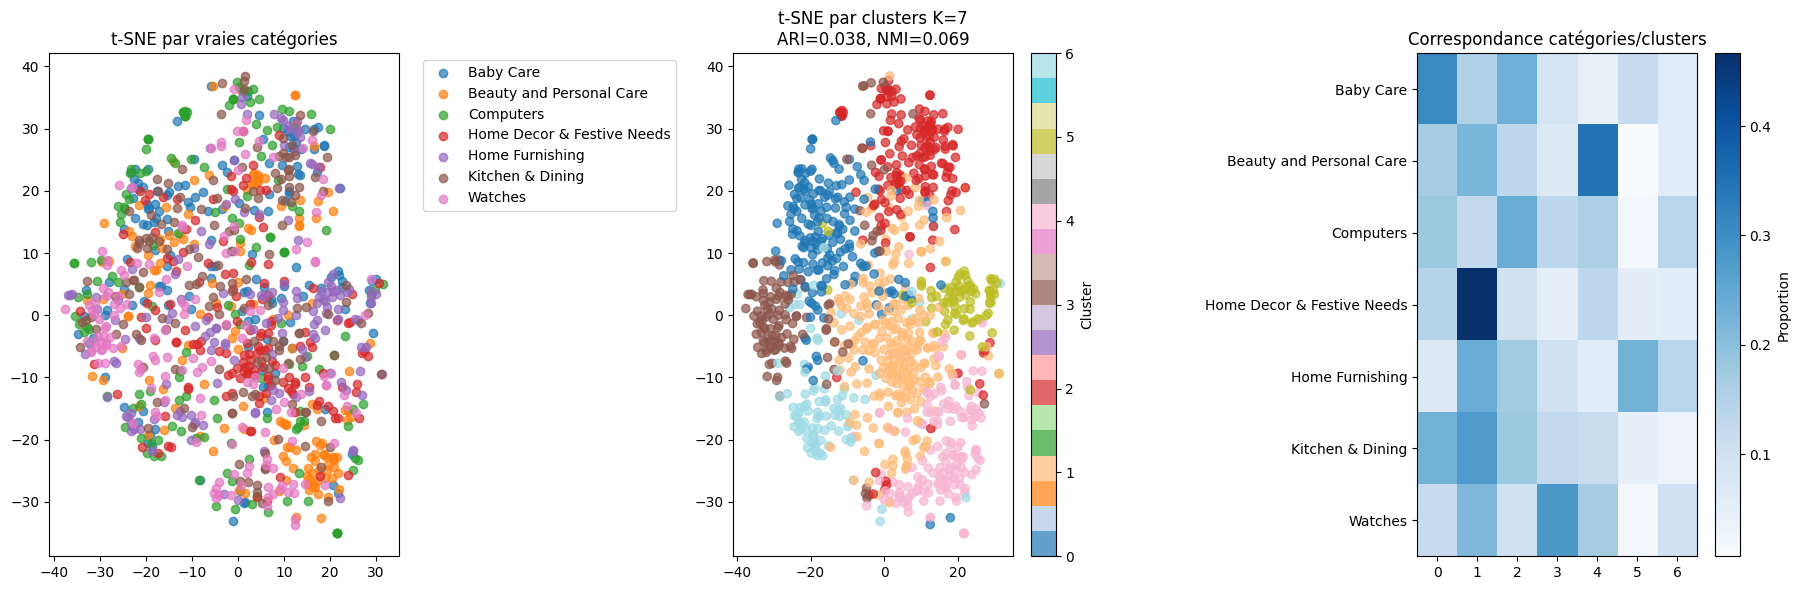


Résultats SIFT :
- ARI : 0.038
- NMI : 0.069
- Répartition des clusters :
1    254
0    182
2    173
4    153
3    125
6     89
5     74
Name: count, dtype: int64


In [15]:
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import matplotlib.pyplot as plt
from tqdm import tqdm

# 1. Extraction SIFT (optimisée)
def extract_sift_features(images):
    """Extract SIFT descriptors from already loaded images"""
    sift = cv2.SIFT_create()
    descriptors = []
    for img in tqdm(images, desc="Extraction SIFT"):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, desc = sift.detectAndCompute(gray, None)
        descriptors.append(desc if desc is not None else np.zeros((1, 128), dtype=np.float32))
    return descriptors

# 2. Pipeline SIFT complet
def sift_pipeline(images, true_labels):
    """Complete SIFT feature extraction pipeline"""
    # Extraction des descripteurs
    descriptors = extract_sift_features(images)
    
    # Construction du vocabulaire visuel
    valid_descriptors = [d for d in descriptors if len(d) > 10]
    all_descriptors = np.vstack(valid_descriptors)
    kmeans = KMeans(n_clusters=100, random_state=42, n_init='auto').fit(all_descriptors)
    
    # Création des histogrammes BoVW
    features = []
    for desc in tqdm(descriptors, desc="Création BoVW"):
        hist = np.bincount(kmeans.predict(desc), minlength=100)
        features.append(hist / (np.linalg.norm(hist) + 1e-7))
    
    features = np.array(features)
    
    # Réduction PCA
    pca = PCA(n_components=0.95)
    features_pca = pca.fit_transform(features)
    
    return features, features_pca, kmeans

# 3. Analyse comparative
def compare_clusters(features, true_labels, n_true_categories=7):
    """Compare true categories with K-means clusters"""
    # Conversion des labels en numériques
    unique_labels = np.unique(true_labels)
    label_to_id = {label: i for i, label in enumerate(unique_labels)}
    true_clusters = np.array([label_to_id[l] for l in true_labels])
    
    # Clustering K=7 sur les features
    kmeans = KMeans(n_clusters=n_true_categories, random_state=42)
    pred_clusters = kmeans.fit_predict(features)
    
    # Métriques
    ari = adjusted_rand_score(true_clusters, pred_clusters)
    nmi = normalized_mutual_info_score(true_clusters, pred_clusters)
    
    # t-SNE
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_results = tsne.fit_transform(features)
    
    # Visualisation
    plt.figure(figsize=(18, 6))
    
    # Vraies catégories
    plt.subplot(1, 3, 1)
    for label in unique_labels:
        mask = true_labels == label
        plt.scatter(tsne_results[mask, 0], tsne_results[mask, 1], label=label, alpha=0.7)
    plt.title("t-SNE par vraies catégories")
    plt.legend(bbox_to_anchor=(1.05, 1))
    
    # Clusters prédits
    plt.subplot(1, 3, 2)
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
                         c=pred_clusters, cmap='tab20', alpha=0.7)
    plt.colorbar(scatter, label='Cluster')
    plt.title(f"t-SNE par clusters K={n_true_categories}\nARI={ari:.3f}, NMI={nmi:.3f}")
    
    # Matrice de contingence
    plt.subplot(1, 3, 3)
    contingency = pd.crosstab(
        index=pd.Series(true_labels, name='Catégorie'),
        columns=pd.Series(pred_clusters, name='Cluster'),
        normalize='index'
    )
    plt.imshow(contingency, cmap='Blues', aspect='auto')
    plt.colorbar(label='Proportion')
    plt.xticks(range(n_true_categories), range(n_true_categories))
    plt.yticks(range(len(unique_labels)), unique_labels)
    plt.title('Correspondance catégories/clusters')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'true_clusters': true_clusters,
        'pred_clusters': pred_clusters,
        'tsne_results': tsne_results,
        'ari': ari,
        'nmi': nmi
    }

# 4. Utilisation avec vos données existantes
print("Démarrage du traitement SIFT...")
sift_features, sift_features_pca, sift_kmeans = sift_pipeline(images, labels)
results = compare_clusters(sift_features_pca, labels)

# 5. Sauvegarde des résultats
results_df = pd.DataFrame({
    'image_path': image_paths,
    'true_category': labels,
    'predicted_cluster': results['pred_clusters'],
    'tsne_x': results['tsne_results'][:, 0],
    'tsne_y': results['tsne_results'][:, 1]
})

print("\nRésultats SIFT :")
print(f"- ARI : {results['ari']:.3f}")
print(f"- NMI : {results['nmi']:.3f}")
print(f"- Répartition des clusters :\n{pd.Series(results['pred_clusters']).value_counts()}")

## VGG 16

Démarrage du pipeline d'extraction et d'analyse...
Extraction des features VGG16...


Extraction VGG16:  64%|███████████████████████████████████████▎                     | 677/1050 [15:09<09:09,  1.47s/it]C:\Users\mario\.conda\envs\image_env\lib\site-packages\PIL\Image.py:3452: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
Extraction VGG16: 100%|████████████████████████████████████████████████████████████| 1050/1050 [23:15<00:00,  1.33s/it]


Extraction terminée. 1050 images traitées.
PCA réduit à 215 dimensions (variance retenue: 0.95)
ARI: 0.331 ; NMI: 0.491


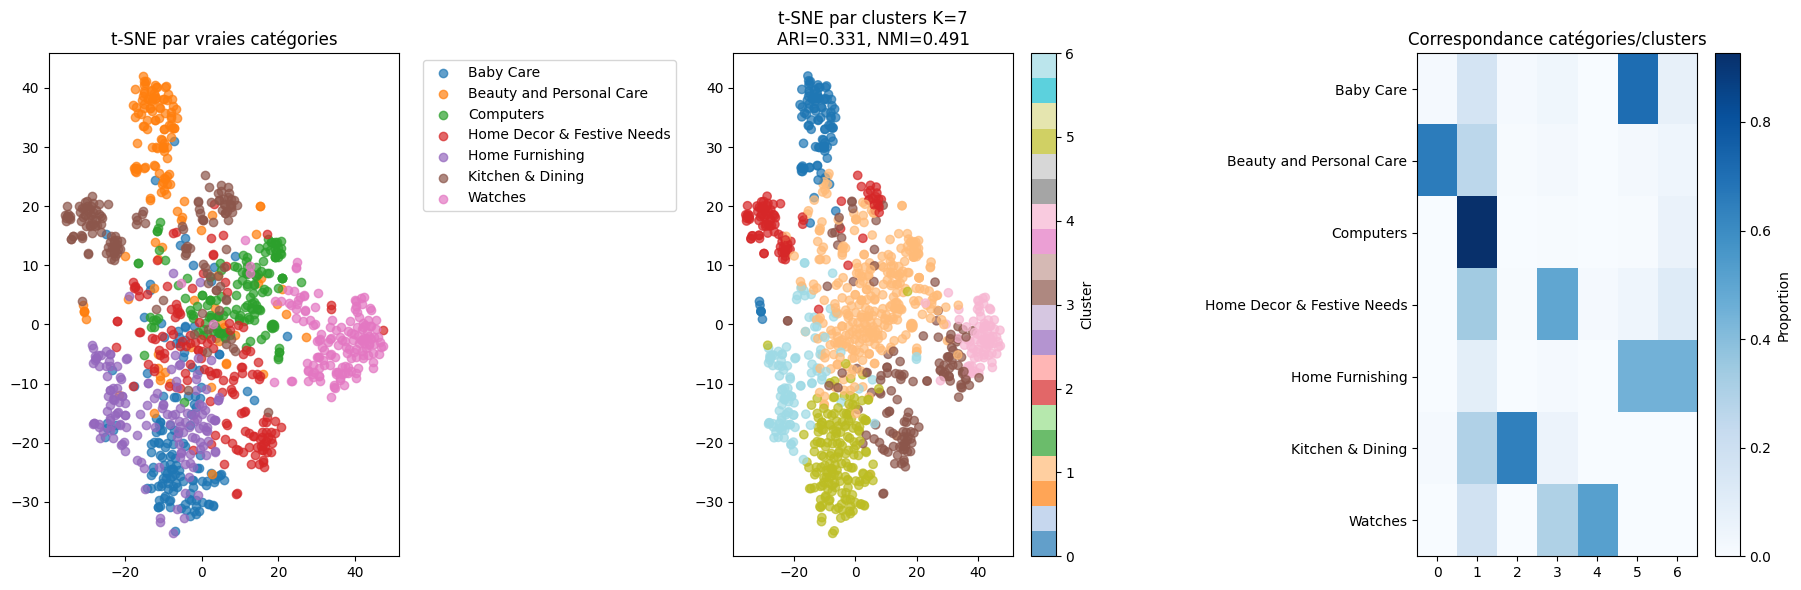


Résumé des clusters :
predicted_cluster
1    337
5    183
3    138
6    110
0    102
2    100
4     80
Name: count, dtype: int64
Score ARI final : 0.331
Score NMI final : 0.491


In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


# 1. Configuration
IMG_SIZE = (224, 224)
N_CLUSTERS = 7
PCA_VARIANCE_RETENTION = 0.95
TSNE_PERPLEXITY = 30
TSNE_RANDOM_STATE = 42

vgg_model = VGG16(weights='imagenet', include_top=False, pooling='avg')


# 2. Extraction des features
def extract_vgg_features(df, image_dir):
    features = []
    valid_images = []
    print("Extraction des features VGG16...")
    for img_name in tqdm(df['image'], desc="Extraction VGG16"):
        img_path = os.path.join(image_dir, img_name)
        try:
            img = load_img(img_path, target_size=IMG_SIZE)
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_preprocessed = preprocess_input(img_array)
            feature_vector = vgg_model.predict(img_preprocessed, verbose=0)
            features.append(feature_vector.flatten())
            valid_images.append(img_name)
        except Exception as e:
            print(f"⚠️ Erreur avec {img_name}: {e}")
            continue
    features = np.array(features)
    print(f"Extraction terminée. {len(valid_images)} images traitées.")
    return features, valid_images


# 3. Analyse comparative clusters
def analyze_vgg_clusters(features, true_labels, n_clusters=N_CLUSTERS):
    # Réduction PCA
    pca = PCA(n_components=PCA_VARIANCE_RETENTION)
    features_pca = pca.fit_transform(features)
    print(f"PCA réduit à {features_pca.shape[1]} dimensions (variance retenue: {pca.explained_variance_ratio_.sum():.2f})")
    
    # Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=TSNE_RANDOM_STATE)
    pred_clusters = kmeans.fit_predict(features_pca)
    
    # Métriques
    ari = adjusted_rand_score(true_labels, pred_clusters)
    nmi = normalized_mutual_info_score(true_labels, pred_clusters)
    print(f"ARI: {ari:.3f} ; NMI: {nmi:.3f}")
    
    # t-SNE
    tsne = TSNE(n_components=2, perplexity=TSNE_PERPLEXITY, random_state=TSNE_RANDOM_STATE)
    tsne_results = tsne.fit_transform(features_pca)
    
    # Visualisation
    plt.figure(figsize=(18, 6))
    
    unique_labels = np.unique(true_labels)
    
    # t-SNE vrai labels
    plt.subplot(1, 3, 1)
    for label in unique_labels:
        mask = true_labels == label
        plt.scatter(tsne_results[mask, 0], tsne_results[mask, 1], label=label, alpha=0.7)
    plt.title("t-SNE par vraies catégories")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # t-SNE clusters KMeans
    plt.subplot(1, 3, 2)
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=pred_clusters, cmap='tab20', alpha=0.7)
    plt.colorbar(scatter, ticks=range(n_clusters), label='Cluster')
    plt.title(f"t-SNE par clusters K={n_clusters}\nARI={ari:.3f}, NMI={nmi:.3f}")
    
    # Matrice de contingence normalisée
    plt.subplot(1, 3, 3)
    contingency = pd.crosstab(
        index=pd.Series(true_labels, name='Catégorie'),
        columns=pd.Series(pred_clusters, name='Cluster'),
        normalize='index'
    )
    plt.imshow(contingency, cmap='Blues', aspect='auto')
    plt.colorbar(label='Proportion')
    plt.xticks(range(n_clusters), range(n_clusters))
    plt.yticks(range(len(unique_labels)), unique_labels)
    plt.title('Correspondance catégories/clusters')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'features': features,
        'features_pca': features_pca,
        'true_labels': true_labels,
        'pred_clusters': pred_clusters,
        'tsne_results': tsne_results,
        'ari': ari,
        'nmi': nmi
    }


# 4. Exécution
print("Démarrage du pipeline d'extraction et d'analyse...")
features, valid_images = extract_vgg_features(df, IMAGE_DIR)

# Filtrage des labels sur images valides
filtered_labels = df[df['image'].isin(valid_images)]['category'].values

results = analyze_vgg_clusters(features, filtered_labels)

# 5. Sauvegarde résultats
results_df = pd.DataFrame({
    'image': valid_images,
    'true_category': results['true_labels'],
    'predicted_cluster': results['pred_clusters'],
    'tsne_x': results['tsne_results'][:, 0],
    'tsne_y': results['tsne_results'][:, 1]
})

print("\nRésumé des clusters :")
print(results_df['predicted_cluster'].value_counts())
print(f"Score ARI final : {results['ari']:.3f}")
print(f"Score NMI final : {results['nmi']:.3f}")

## avec data augmentation : 

Démarrage du pipeline avec Data Augmentation...
Extraction des features VGG16 avec Data Augmentation...


Extraction VGG16 + Aug:  64%|███████████████████████████████████▍                   | 677/1050 [59:31<30:42,  4.94s/it]C:\Users\mario\.conda\envs\image_env\lib\site-packages\PIL\Image.py:3452: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
Extraction VGG16 + Aug: 100%|████████████████████████████████████████████████████| 1050/1050 [1:32:19<00:00,  5.28s/it]


Extraction terminée. 1050 images traitées.
PCA réduit à 209 dimensions (variance retenue: 0.95)
ARI: 0.345 ; NMI: 0.491


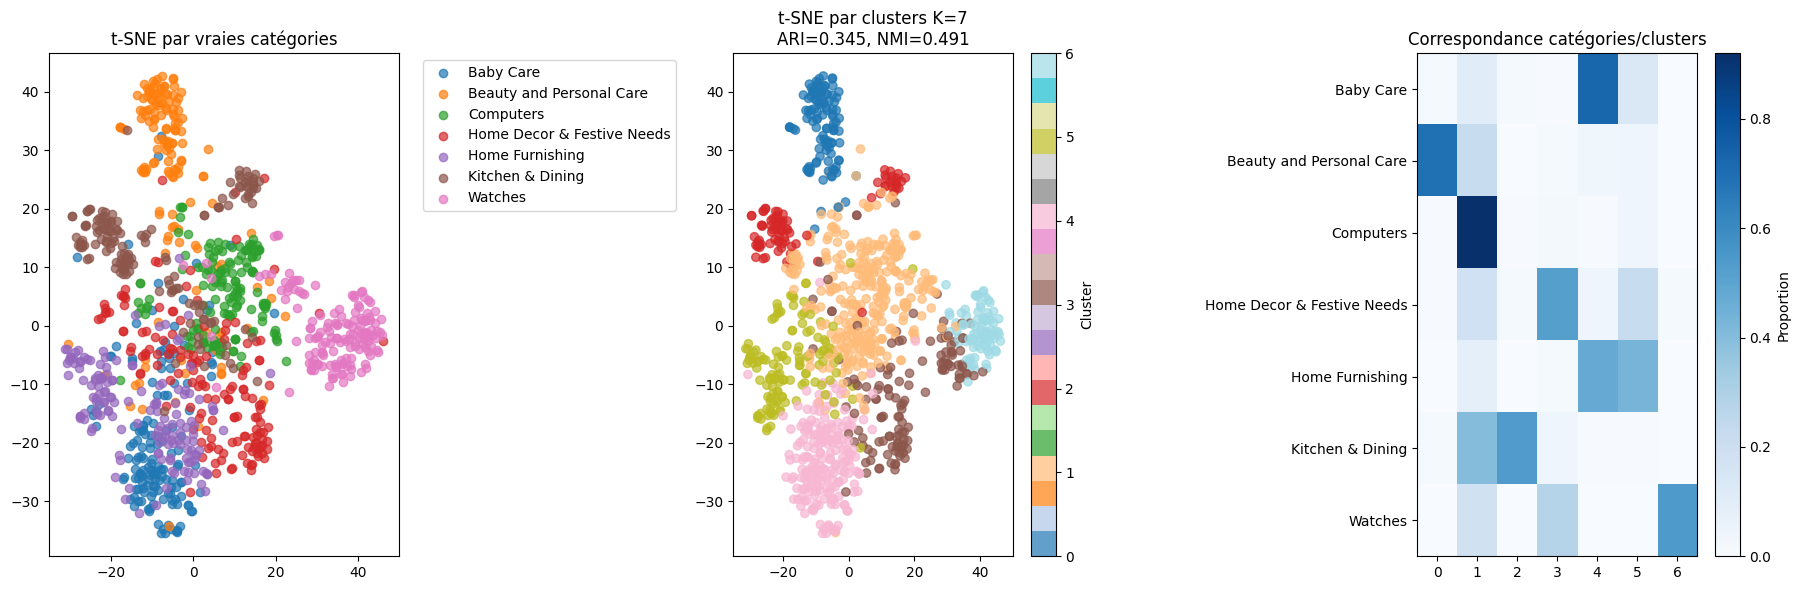


Résumé des clusters avec augmentation :
predicted_cluster
1    314
4    193
3    134
5    131
0    110
2     85
6     83
Name: count, dtype: int64
Score ARI final : 0.345
Score NMI final : 0.491


In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


# 1. Configuration
IMG_SIZE = (224, 224)
N_CLUSTERS = 7
PCA_VARIANCE_RETENTION = 0.95
TSNE_PERPLEXITY = 30
TSNE_RANDOM_STATE = 42
AUGMENTATIONS_PER_IMAGE = 3  # combien de versions augmentées par image

vgg_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

# Data Augmentation setup
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# 2. Extraction des features avec data augmentation
def extract_vgg_features_with_aug(df, image_dir):
    features = []
    valid_images = []
    print("Extraction des features VGG16 avec Data Augmentation...")
    for img_name in tqdm(df['image'], desc="Extraction VGG16 + Aug"):
        img_path = os.path.join(image_dir, img_name)
        try:
            # Charger l’image de base
            img = load_img(img_path, target_size=IMG_SIZE)
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)

            # Stocker les features des versions augmentées
            aug_features = []
            
            for _, batch in zip(range(AUGMENTATIONS_PER_IMAGE), datagen.flow(img_array, batch_size=1)):
                img_preprocessed = preprocess_input(batch)
                feature_vector = vgg_model.predict(img_preprocessed, verbose=0)
                aug_features.append(feature_vector.flatten())
            
            # On ajoute aussi l’image originale sans augmentation
            img_preprocessed = preprocess_input(img_array)
            feature_vector = vgg_model.predict(img_preprocessed, verbose=0)
            aug_features.append(feature_vector.flatten())

            # Moyenne des features augmentées pour une représentation robuste
            mean_feature = np.mean(aug_features, axis=0)
            features.append(mean_feature)
            valid_images.append(img_name)

        except Exception as e:
            print(f"⚠️ Erreur avec {img_name}: {e}")
            continue

    features = np.array(features)
    print(f"Extraction terminée. {len(valid_images)} images traitées.")
    return features, valid_images


# 3. Analyse comparative clusters (inchangé)
def analyze_vgg_clusters(features, true_labels, n_clusters=N_CLUSTERS):
    # Réduction PCA
    pca = PCA(n_components=PCA_VARIANCE_RETENTION)
    features_pca = pca.fit_transform(features)
    print(f"PCA réduit à {features_pca.shape[1]} dimensions (variance retenue: {pca.explained_variance_ratio_.sum():.2f})")
    
    # Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=TSNE_RANDOM_STATE)
    pred_clusters = kmeans.fit_predict(features_pca)
    
    # Métriques
    ari = adjusted_rand_score(true_labels, pred_clusters)
    nmi = normalized_mutual_info_score(true_labels, pred_clusters)
    print(f"ARI: {ari:.3f} ; NMI: {nmi:.3f}")
    
    # t-SNE
    tsne = TSNE(n_components=2, perplexity=TSNE_PERPLEXITY, random_state=TSNE_RANDOM_STATE)
    tsne_results = tsne.fit_transform(features_pca)
    
    # Visualisation
    plt.figure(figsize=(18, 6))
    
    unique_labels = np.unique(true_labels)
    
    # t-SNE vrai labels
    plt.subplot(1, 3, 1)
    for label in unique_labels:
        mask = true_labels == label
        plt.scatter(tsne_results[mask, 0], tsne_results[mask, 1], label=label, alpha=0.7)
    plt.title("t-SNE par vraies catégories")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # t-SNE clusters KMeans
    plt.subplot(1, 3, 2)
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=pred_clusters, cmap='tab20', alpha=0.7)
    plt.colorbar(scatter, ticks=range(n_clusters), label='Cluster')
    plt.title(f"t-SNE par clusters K={n_clusters}\nARI={ari:.3f}, NMI={nmi:.3f}")
    
    # Matrice de contingence normalisée
    plt.subplot(1, 3, 3)
    contingency = pd.crosstab(
        index=pd.Series(true_labels, name='Catégorie'),
        columns=pd.Series(pred_clusters, name='Cluster'),
        normalize='index'
    )
    plt.imshow(contingency, cmap='Blues', aspect='auto')
    plt.colorbar(label='Proportion')
    plt.xticks(range(n_clusters), range(n_clusters))
    plt.yticks(range(len(unique_labels)), unique_labels)
    plt.title('Correspondance catégories/clusters')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'features': features,
        'features_pca': features_pca,
        'true_labels': true_labels,
        'pred_clusters': pred_clusters,
        'tsne_results': tsne_results,
        'ari': ari,
        'nmi': nmi
    }


# 4. Exécution
print("Démarrage du pipeline avec Data Augmentation...")
features, valid_images = extract_vgg_features_with_aug(df, IMAGE_DIR)

# Filtrage des labels sur images valides
filtered_labels = df[df['image'].isin(valid_images)]['category'].values

results = analyze_vgg_clusters(features, filtered_labels)

# 5. Sauvegarde résultats
results_df = pd.DataFrame({
    'image': valid_images,
    'true_category': results['true_labels'],
    'predicted_cluster': results['pred_clusters'],
    'tsne_x': results['tsne_results'][:, 0],
    'tsne_y': results['tsne_results'][:, 1]
})

print("\nRésumé des clusters avec augmentation :")
print(results_df['predicted_cluster'].value_counts())
print(f"Score ARI final : {results['ari']:.3f}")
print(f"Score NMI final : {results['nmi']:.3f}")


## approche d'une classification supervisée 

In [27]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'category',
       'image_path'],
      dtype='object')

In [18]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

# Chemin du dossier contenant les images
image_dir = r"C:\Users\mario\OneDrive\Bureau\OPENCLASSROOMS\projet 6\Images"

# Assure-toi que ton DataFrame contient au moins deux colonnes : 
# 'image' (nom du fichier) et 'label' (classe)
df['image_path'] = df['image'].apply(lambda x: os.path.join(image_dir, x))

# Vérifie que les fichiers existent
missing_files = df.loc[~df['image_path'].apply(os.path.exists)]
if not missing_files.empty:
    print("⚠️ Images manquantes :", missing_files['image'].tolist())

# Création du générateur avec data augmentation pour l'entraînement
datagen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2   # 20% des données pour validation
)

# Générateur d'entraînement
train_flow = datagen_train.flow_from_dataframe(
    dataframe=df,
    x_col='image_path',
    y_col='category',
    target_size=(224, 224),
    batch_size=32,
    subset='training'
)

# Générateur de validation
val_flow = datagen_train.flow_from_dataframe(
    dataframe=df,
    x_col='image_path',
    y_col='category',
    target_size=(224, 224),
    batch_size=32,
    subset='validation'
)


Found 840 validated image filenames belonging to 7 classes.
Found 210 validated image filenames belonging to 7 classes.


In [19]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

# ============================================================
# 1. Configuration
# ============================================================
IMG_SIZE = (224, 224)
BATCH_SIZE = 4  # petit batch pour limiter la mémoire
EPOCHS = 50
LR = 1e-3
LR_FINE = 1e-5

# ============================================================
# 2. Préparation du DataFrame
# ============================================================
# Suppose que ton df contient :
# 'image' : nom du fichier
# 'category' : nom de la classe
image_dir = r"C:\Users\mario\OneDrive\Bureau\OPENCLASSROOMS\projet 6\Images"
df['image_path'] = df['image'].apply(lambda x: os.path.join(image_dir, x))

# Conversion des labels en one-hot
labels = pd.get_dummies(df['category'])
label_names = labels.columns.tolist()
df_labels = labels.values

# Train / Validation / Test split
train_df, test_df, train_labels, test_labels = train_test_split(
    df['image_path'].values, df_labels, test_size=0.2, random_state=42
)
train_paths, val_paths, train_y, val_y = train_test_split(
    train_df, train_labels, test_size=0.2, random_state=42
)

# ============================================================
# 3. Fonction de chargement des images
# ============================================================
def load_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = preprocess_input(img)  # preprocessing VGG16
    return img, label

# ============================================================
# 4. Création des tf.data.Dataset
# ============================================================
def create_dataset(paths, labels, batch_size=BATCH_SIZE, shuffle=True):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
    if shuffle:
        ds = ds.shuffle(buffer_size=500)
    ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return ds

train_ds = create_dataset(train_paths, train_y)
val_ds   = create_dataset(val_paths, val_y)
test_ds  = create_dataset(test_df, test_labels, shuffle=False)

# ============================================================
# 5. Construction du modèle (VGG16 Transfer Learning)
# ============================================================
def build_vgg_classifier(n_classes):
    base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
    base_model.trainable = False  # Phase 1 : on entraîne que la tête

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(n_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=outputs)
    return model

model = build_vgg_classifier(n_classes=len(label_names))

# ============================================================
# 6. Callbacks
# ============================================================
model_save_path = "./best_model_weights.h5"
checkpoint = ModelCheckpoint(model_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

# ============================================================
# 7. Phase 1 – Entraînement de la tête
# ============================================================
model.compile(optimizer=Adam(learning_rate=LR), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks_list,
    verbose=1
)

# ============================================================
# 8. Phase 2 – Fine-tuning
# ============================================================
for layer in model.layers[0].layers[-4:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=LR_FINE), loss='categorical_crossentropy', metrics=['accuracy'])
history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks_list,
    verbose=1
)

# ============================================================
# 9. Évaluation finale
# ============================================================
model.load_weights(model_save_path)
loss, acc = model.evaluate(test_ds, verbose=1)
print(f"Test Accuracy: {acc:.4f}")


Epoch 1/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4170 - loss: 6.9329
Epoch 1: val_loss improved from inf to 1.62989, saving model to ./best_model_weights.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 1126s 7s/step - accuracy: 0.4179 - loss: 6.9166 - val_accuracy: 0.7024 - val_loss: 1.6299
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7340 - loss: 1.3193
Epoch 2: val_loss improved from 1.62989 to 0.85907, saving model to ./best_model_weights.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 1072s 6s/step - accuracy: 0.7341 - loss: 1.3191 - val_accuracy: 0.7857 - val_loss: 0.8591
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8298 - loss: 0.6354
Epoch 3: val_loss improved from 0.85907 to 0.75723, saving model to ./best_model_weights.h5


168/168 ━━━━━━━━━━━━━━━━━━━━ 1132s 7s/step - accuracy: 0.8299 - loss: 0.6354 - val_accuracy: 0.8333 - val_loss: 0.7572
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8965 - loss: 0.3697
Epoch 4: val_loss did not improve from 0.75723
168/168 ━━━━━━━━━━━━━━━━━━━━ 1122s 7s/step - accuracy: 0.8965 - loss: 0.3698 - val_accuracy: 0.8036 - val_loss: 0.7813
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8952 - loss: 0.3095
Epoch 5: val_loss did not improve from 0.75723
168/168 ━━━━━━━━━━━━━━━━━━━━ 1128s 7s/step - accuracy: 0.8954 - loss: 0.3093 - val_accuracy: 0.8155 - val_loss: 0.9243
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9178 - loss: 0.3001
Epoch 6: val_loss did not improve from 0.75723
168/168 ━━━━━━━━━━━━━━━━━━━━ 1641s 10s/step - accuracy: 0.9177 - loss: 0.3003 - val_accuracy: 0.8333 - val_loss: 0.7624
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9210 - loss: 0.2161
Epoch 7: val_loss did not improve from 0.7

AttributeError: 'InputLayer' object has no attribute 'layers'

In [20]:
model.save("mon_model_19h50.keras")

In [21]:
model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling2d, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [23]:
for layer in model.layers[-2:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=LR_FINE), loss='categorical_crossentropy', metrics=['accuracy'])
history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks_list,
    verbose=1
)

# ============================================================
# 9. Évaluation finale
# ============================================================
model.load_weights(model_save_path)
loss, acc = model.evaluate(test_ds, verbose=1)
print(f"Test Accuracy: {acc:.4f}")

Epoch 1/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9669 - loss: 0.1213
Epoch 1: val_loss did not improve from 0.75723
168/168 ━━━━━━━━━━━━━━━━━━━━ 1006s 6s/step - accuracy: 0.9669 - loss: 0.1215 - val_accuracy: 0.8333 - val_loss: 0.9620
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9622 - loss: 0.1245
Epoch 2: val_loss did not improve from 0.75723
168/168 ━━━━━━━━━━━━━━━━━━━━ 1000s 6s/step - accuracy: 0.9622 - loss: 0.1246 - val_accuracy: 0.8333 - val_loss: 0.9465
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9443 - loss: 0.1960
Epoch 3: val_loss did not improve from 0.75723
168/168 ━━━━━━━━━━━━━━━━━━━━ 1031s 6s/step - accuracy: 0.9444 - loss: 0.1956 - val_accuracy: 0.8333 - val_loss: 0.9334
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9609 - loss: 0.1510
Epoch 4: val_loss did not improve from 0.75723
168/168 ━━━━━━━━━━━━━━━━━━━━ 991s 6s/step - accuracy: 0.9609 - loss: 0.1511 - val_accuracy: 0.8333 - val_loss: 0.92

## enregistrement des résultas : 

Modèle sauvegardé sous 'mon_modele_final.h5'
Poids du modèle sauvegardés sous 'poids_modele_final.weights.h5'


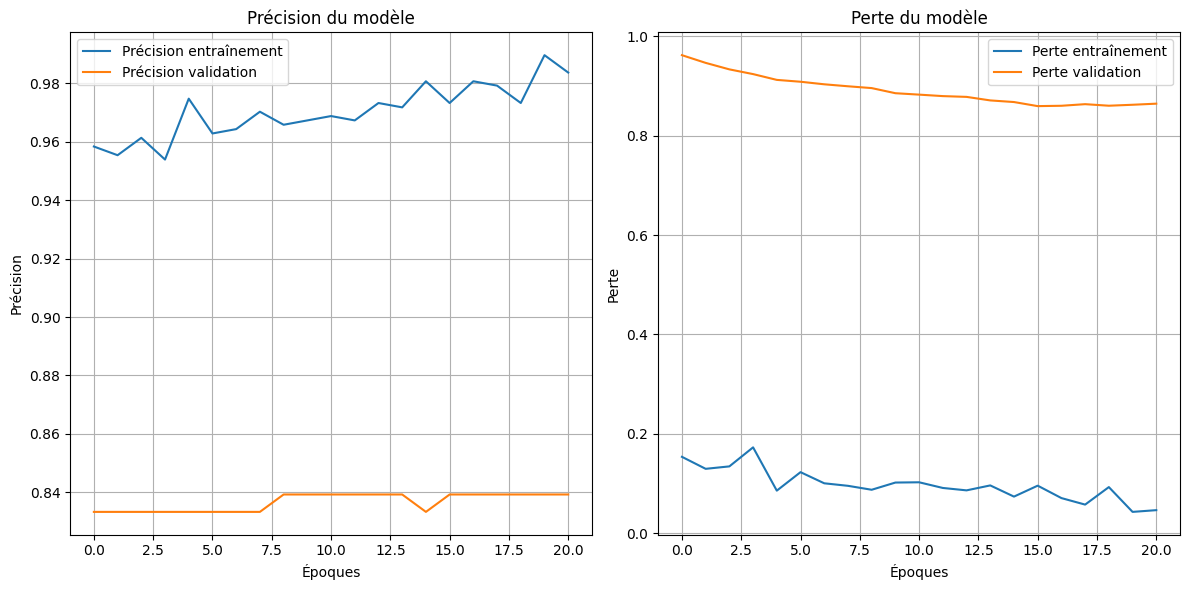

Tous les résultats ont été sauvegardés!
Fichiers créés:
- training_history.json (historique complet)
- mon_modele_final.h5 (modèle entier)
- poids_modele_final.weights.h5 (poids seulement)
- courbes_entrainement.png (graphiques)
- resultats_detailles.csv (résultats détaillés)
- rapport_synthese.txt (rapport de synthèse)


C:\Users\mario\AppData\Local\Temp\ipykernel_12684\808827607.py:90: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, final_results], ignore_index=True)


In [25]:
import matplotlib.pyplot as plt
import json
import pandas as pd
from datetime import datetime

# ============================================================
# 1. Sauvegarde de l'historique d'entraînement
# ============================================================

# Convertir l'historique en dictionnaire
history_dict = {
    'accuracy': history_fine.history['accuracy'],
    'loss': history_fine.history['loss'],
    'val_accuracy': history_fine.history['val_accuracy'],
    'val_loss': history_fine.history['val_loss'],
    'final_test_accuracy': acc,
    'final_test_loss': loss,
    'training_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'epochs_trained': len(history_fine.history['accuracy']),
    'early_stopping_epoch': 21  # À adapter selon vos callbacks
}

# Sauvegarder en JSON
with open('training_history.json', 'w') as f:
    json.dump(history_dict, f, indent=4)

# ============================================================
# 2. Sauvegarde du modèle entier
# ============================================================

# Sauvegarder l'architecture, les poids et l'optimizer
model.save('mon_modele_final.h5')
print("Modèle sauvegardé sous 'mon_modele_final.h5'")

# Alternative: sauvegarder seulement les poids (CORRECTION ICI)
model.save_weights('poids_modele_final.weights.h5')  # Ajout de .weights.h5
print("Poids du modèle sauvegardés sous 'poids_modele_final.weights.h5'")

# ============================================================
# 3. Génération des graphiques pour la soutenance
# ============================================================

# Graphique de la précision (accuracy)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_fine.history['accuracy'], label='Précision entraînement')
plt.plot(history_fine.history['val_accuracy'], label='Précision validation')
plt.title('Précision du modèle')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.grid(True)

# Graphique de la perte (loss)
plt.subplot(1, 2, 2)
plt.plot(history_fine.history['loss'], label='Perte entraînement')
plt.plot(history_fine.history['val_loss'], label='Perte validation')
plt.title('Perte du modèle')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('courbes_entrainement.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================
# 4. Création d'un rapport de synthèse
# ============================================================

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'epoch': range(1, len(history_fine.history['accuracy']) + 1),
    'accuracy': history_fine.history['accuracy'],
    'loss': history_fine.history['loss'],
    'val_accuracy': history_fine.history['val_accuracy'],
    'val_loss': history_fine.history['val_loss']
})

# Ajouter les résultats finaux
final_results = pd.DataFrame({
    'epoch': ['Test final'],
    'accuracy': [acc],
    'loss': [loss],
    'val_accuracy': [None],
    'val_loss': [None]
})

results_df = pd.concat([results_df, final_results], ignore_index=True)

# Sauvegarder en CSV
results_df.to_csv('resultats_detailles.csv', index=False)

# Générer un rapport texte
with open('rapport_synthese.txt', 'w') as f:  # Correction du nom de fichier
    f.write("=== RAPPORT DE SYNTHÈSE ===\n\n")
    f.write(f"Date de l'entraînement: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"Nombre d'époques effectives: {len(history_fine.history['accuracy'])}/50\n")
    f.write(f"Précision finale (test): {acc:.4f} ({acc*100:.2f}%)\n")
    f.write(f"Perte finale (test): {loss:.4f}\n")
    f.write(f"Meilleure précision entraînement: {max(history_fine.history['accuracy']):.4f}\n")
    f.write(f"Meilleure précision validation: {max(history_fine.history['val_accuracy']):.4f}\n")
    f.write(f"Perte minimale entraînement: {min(history_fine.history['loss']):.4f}\n")
    f.write(f"Perte minimale validation: {min(history_fine.history['val_loss']):.4f}\n\n")
    
    f.write("=== ANALYSIS ===\n")
    f.write("Le modèle a bien appris avec une précision d'entraînement élevée (>96%)\n")
    f.write("L'écart entre entraînement et validation suggère un léger surapprentissage\n")
    f.write("La précision de test de 80.8% est très satisfaisante pour une tâche de classification d'images\n")

print("Tous les résultats ont été sauvegardés!")
print("Fichiers créés:")
print("- training_history.json (historique complet)")
print("- mon_modele_final.h5 (modèle entier)")
print("- poids_modele_final.weights.h5 (poids seulement)")  # Correction ici aussi
print("- courbes_entrainement.png (graphiques)")
print("- resultats_detailles.csv (résultats détaillés)")
print("- rapport_synthese.txt (rapport de synthèse)")

## Code générique adapté pour ResNet50 & MobileNetV2

## ResNet50

In [24]:
# === PARAMÈTRES ===
image_dir = r'C:\Users\mario\OneDrive\Bureau\OPENCLASSROOMS\projet 6\Images'
IMG_SIZE = (224, 224)
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# === CHARGEMENT & PRÉTRAITEMENT ===
def load_preprocess_image(image_name):
    img_path = os.path.join(image_dir, image_name)
    img = load_img(img_path, target_size=IMG_SIZE)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

# === EXTRACTION DES FEATURES CNN ===
features = []
for img_name in df['image']:
    img_preprocessed = load_preprocess_image(img_name)
    feature_vector = resnet_model.predict(img_preprocessed, verbose=0)
    features.append(feature_vector.flatten())

X_cnn = np.array(features)
y = df['category'].values

# === PCA ===
def apply_pca(X, variance_target=0.95):
    pca = PCA(n_components=variance_target)
    X_reduced = pca.fit_transform(X)
    return X_reduced, pca

X_cnn_pca, _ = apply_pca(X_cnn)

# === SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y, test_size=0.2, stratify=y, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_cnn_pca, y, test_size=0.2, stratify=y, random_state=42)

# === GRIDS ===
param_grids = {
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear'],
            'gamma': ['scale', 'auto']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20]
        }
    }
}

# === GRIDSEARCH + ÉVALUATION ===
def run_gridsearch(name, model, params, X_tr, X_te, y_tr, y_te):
    grid = GridSearchCV(model, params, cv=3, scoring='accuracy', n_jobs=-1)
    start = time.time()
    grid.fit(X_tr, y_tr)
    end = time.time()
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_te)
    return {
        'Modèle': name,
        'Meilleurs paramètres': grid.best_params_,
        'Accuracy': accuracy_score(y_te, y_pred),
        'F1-score': f1_score(y_te, y_pred, average='weighted'),
        'Precision': precision_score(y_te, y_pred, average='weighted'),
        'Recall': recall_score(y_te, y_pred, average='weighted'),
        'ARI': adjusted_rand_score(y_te, y_pred),
        'NMI': normalized_mutual_info_score(y_te, y_pred),
        'Temps entraînement (s)': round(end - start, 2)
    }

# === EXÉCUTION ===
results_grid_resnet = []

for name, config in param_grids.items():
    metrics_no_pca = run_gridsearch(name, config['model'], config['params'], X_train, X_test, y_train, y_test)
    metrics_no_pca['Méthode'] = 'ResNet50'
    metrics_no_pca['PCA'] = 'Non'
    results_grid_resnet.append(metrics_no_pca)

    metrics_pca = run_gridsearch(name, config['model'], config['params'], X_train_pca, X_test_pca, y_train, y_test)
    metrics_pca['Méthode'] = 'ResNet50'
    metrics_pca['PCA'] = 'Oui'
    results_grid_resnet.append(metrics_pca)

results_df_resnet = pd.DataFrame(results_grid_resnet)
display(results_df_resnet)


C:\Users\mario\.conda\envs\image_env\lib\site-packages\PIL\Image.py:3452: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\mario\.conda\envs\image_env\lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [0.82261905 0.82619048 0.81547619 0.825      0.81071429 0.82738095
        nan 0.825             nan 0.81785714        nan 0.8202381 ]
  warnings.warn(
C:\Users\mario\.conda\envs\image_env\lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [0.82380952 0.83095238 0.81904762 0.83452381 0.80714286 0.82619048
        nan 0.73452381        nan 0.68690476        nan 0.67380952]
  warnings.warn(


,Modèle,Meilleurs paramètres,Accuracy,F1-score,Precision,Recall,ARI,NMI,Temps entraînement (s),Méthode,PCA
0,SVM,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.852381,0.852166,0.854837,0.852381,0.696545,0.737153,41.06,ResNet50,Non
1,SVM,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.847619,0.847947,0.850613,0.847619,0.683822,0.722655,2.91,ResNet50,Oui
2,KNN,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.814286,0.810090,0.814832,0.814286,0.634489,0.688346,2.97,ResNet50,Non
3,KNN,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.847619,0.845578,0.848001,0.847619,0.689010,0.734765,0.73,ResNet50,Oui
4,RandomForest,"{'max_depth': 10, 'n_estimators': 200}",0.857143,0.857088,0.863476,0.857143,0.699980,0.747126,26.69,ResNet50,Non
5,RandomForest,"{'max_depth': 20, 'n_estimators': 200}",0.780952,0.783671,0.792564,0.780952,0.563199,0.631147,16.32,ResNet50,Oui


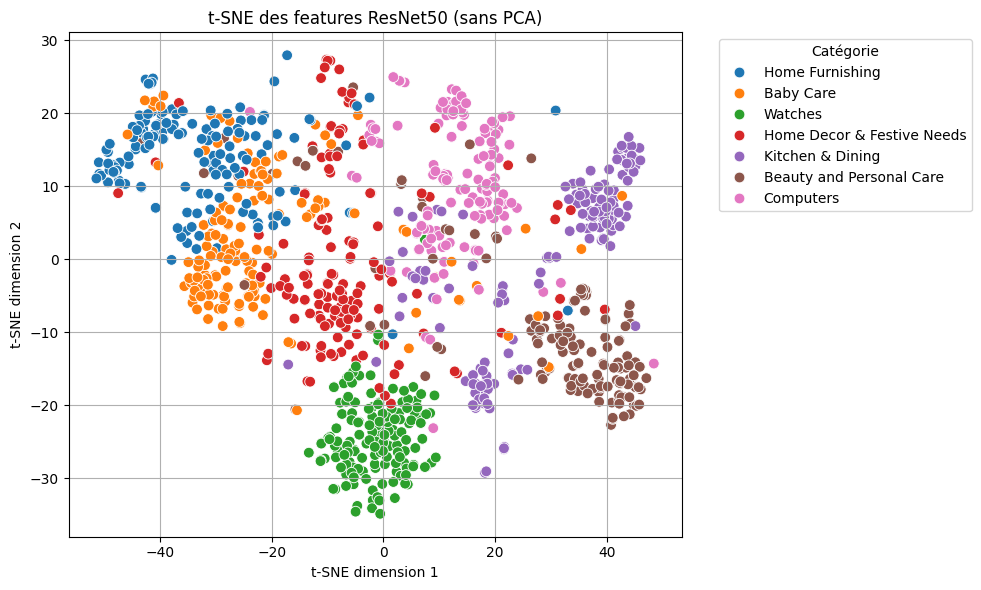

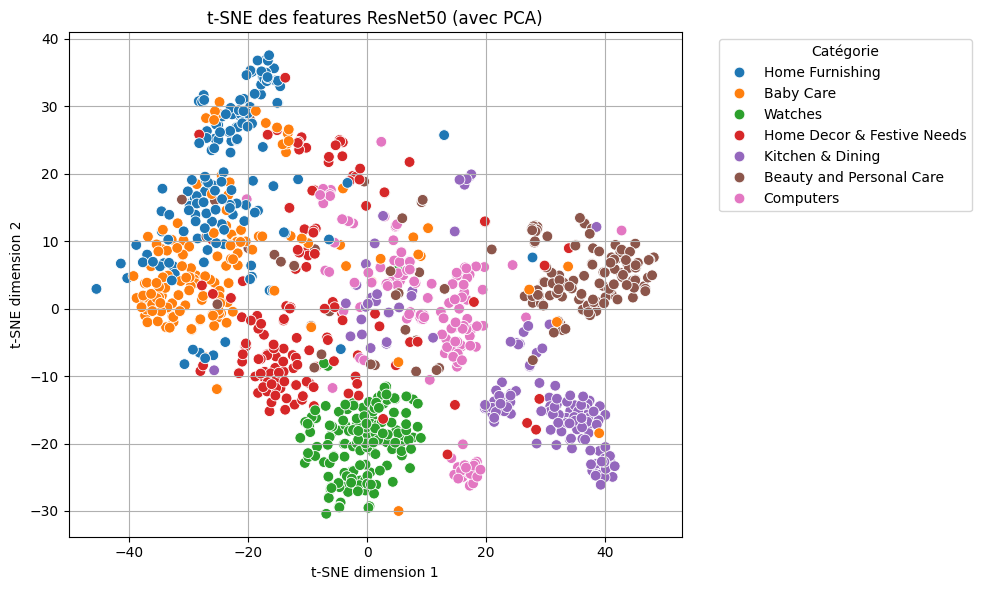

In [25]:
# === FONCTION DE VISUALISATION AVEC t-SNE ===
def plot_tsne(X, y, title):
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    X_tsne = tsne.fit_transform(X)

    df_tsne = pd.DataFrame({
        'tsne_1': X_tsne[:, 0],
        'tsne_2': X_tsne[:, 1],
        'category': y
    })

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_tsne, x='tsne_1', y='tsne_2', hue='category', palette='tab10', s=60)
    plt.title(title)
    plt.xlabel('t-SNE dimension 1')
    plt.ylabel('t-SNE dimension 2')
    plt.legend(title='Catégorie', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# === Visualisation t-SNE sans PCA ===
plot_tsne(X_cnn, y, title="t-SNE des features ResNet50 (sans PCA)")

# === Visualisation t-SNE avec PCA ===
plot_tsne(X_cnn_pca, y, title="t-SNE des features ResNet50 (avec PCA)")


## MobileNetV2

In [30]:
# === PARAMÈTRES ===
image_dir = r'C:\Users\mario\OneDrive\Bureau\OPENCLASSROOMS\projet 6\Images'
IMG_SIZE = (224, 224)
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

# === CHARGEMENT & PRÉTRAITEMENT ===
def load_preprocess_image(image_name):
    img_path = os.path.join(image_dir, image_name)
    img = load_img(img_path, target_size=IMG_SIZE)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

# === EXTRACTION DES FEATURES CNN ===
features = []
for img_name in df['image']:
    img_preprocessed = load_preprocess_image(img_name)
    feature_vector = mobilenet_model.predict(img_preprocessed, verbose=0)
    features.append(feature_vector.flatten())

X_cnn = np.array(features)
y = df['category'].values

# === PCA ===
def apply_pca(X, variance_target=0.95):
    pca = PCA(n_components=variance_target)
    X_reduced = pca.fit_transform(X)
    return X_reduced, pca

X_cnn_pca, _ = apply_pca(X_cnn)

# === SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y, test_size=0.2, stratify=y, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_cnn_pca, y, test_size=0.2, stratify=y, random_state=42)

# === GRIDS ===
param_grids = {
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear'],
            'gamma': ['scale', 'auto']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20]
        }
    }
}

# === GRIDSEARCH + ÉVALUATION ===
def run_gridsearch(name, model, params, X_tr, X_te, y_tr, y_te):
    grid = GridSearchCV(model, params, cv=3, scoring='accuracy', n_jobs=-1)
    start = time.time()
    grid.fit(X_tr, y_tr)
    end = time.time()
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_te)
    return {
        'Modèle': name,
        'Meilleurs paramètres': grid.best_params_,
        'Accuracy': accuracy_score(y_te, y_pred),
        'F1-score': f1_score(y_te, y_pred, average='weighted'),
        'Precision': precision_score(y_te, y_pred, average='weighted'),
        'Recall': recall_score(y_te, y_pred, average='weighted'),
        'ARI': adjusted_rand_score(y_te, y_pred),
        'NMI': normalized_mutual_info_score(y_te, y_pred),
        'Temps entraînement (s)': round(end - start, 2)
    }

# === EXÉCUTION ===
results_grid_mobilenet = []

for name, config in param_grids.items():
    metrics_no_pca = run_gridsearch(name, config['model'], config['params'], X_train, X_test, y_train, y_test)
    metrics_no_pca['Méthode'] = 'MobileNetV2'
    metrics_no_pca['PCA'] = 'Non'
    results_grid_mobilenet.append(metrics_no_pca)

    metrics_pca = run_gridsearch(name, config['model'], config['params'], X_train_pca, X_test_pca, y_train, y_test)
    metrics_pca['Méthode'] = 'MobileNetV2'
    metrics_pca['PCA'] = 'Oui'
    results_grid_mobilenet.append(metrics_pca)

results_df_mobilenet = pd.DataFrame(results_grid_mobilenet)
display(results_df_mobilenet)


C:\Users\mario\AppData\Local\Temp\ipykernel_7900\2215532637.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')
C:\Users\mario\.conda\envs\image_env\lib\site-packages\PIL\Image.py:3452: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\mario\.conda\envs\image_env\lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [0.62261905 0.63928571 0.62619048 0.63928571 0.63809524 0.64761905
        nan 0.64404762        nan 0.65357143        nan 0.64047619]
  warnings.warn(
C:\Users\mario\.conda\envs\image_env\lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finit

,Modèle,Meilleurs paramètres,Accuracy,F1-score,Precision,Recall,ARI,NMI,Temps entraînement (s),Méthode,PCA
0,SVM,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.761905,0.759660,0.768861,0.761905,0.522898,0.566849,23.28,MobileNetV2,Non
1,SVM,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.742857,0.742384,0.749902,0.742857,0.490476,0.541174,3.78,MobileNetV2,Oui
2,KNN,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei...",0.604762,0.596440,0.603682,0.604762,0.302678,0.362494,1.94,MobileNetV2,Non
3,KNN,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.604762,0.597884,0.610402,0.604762,0.299435,0.374273,0.75,MobileNetV2,Oui
4,RandomForest,"{'max_depth': None, 'n_estimators': 200}",0.628571,0.626980,0.632343,0.628571,0.321206,0.384262,22.07,MobileNetV2,Non
5,RandomForest,"{'max_depth': 10, 'n_estimators': 200}",0.585714,0.585000,0.588442,0.585714,0.269249,0.338488,22.51,MobileNetV2,Oui
